In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
print(animation.writers.list())

['pillow', 'ffmpeg', 'ffmpeg_file', 'imagemagick', 'imagemagick_file', 'html']


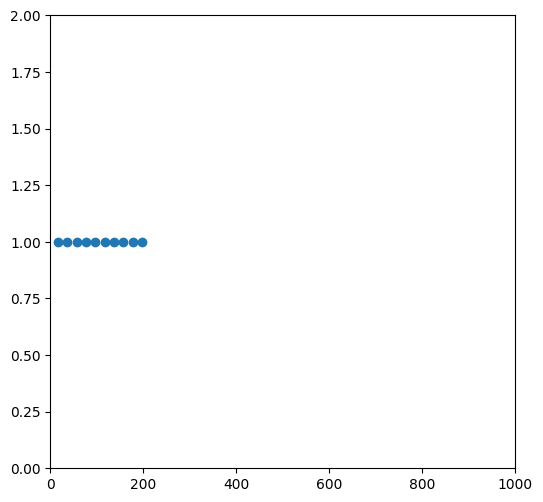

In [57]:
# single lane animation
df = pd.read_csv('../build/data/position.csv', index_col=False)
data = df.to_numpy()

t = data[:,0]
location = data[:, 1:]

car_num = location.shape[1]

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots(figsize=(6,6), dpi=100)

ax.set_xlim(( 0, 200))
ax.set_ylim((0, 2))
scat = ax.scatter([], [])

# initialization function: plot the background of each frame
def init():
    scat.set_offsets([0,0])
    return (scat,)

# animation function. This is called sequentially
def animate(i):
    x = location[i,:]
    y = np.ones(car_num)
    plot_data = np.array([x,y])
    plot_data = np.transpose(plot_data)
    
    scat.set_offsets(plot_data)
    return (scat,)


# call the animator. blit=True means only re-draw the parts that have changed so that the animations display much more quickly.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(t), interval=30, blit=True)


anim.save('single_lane.mp4', writer = 'ffmpeg')

In [8]:
# multi lane
df = pd.read_csv('../build/data/multi_lane.csv', index_col=False)
data = df.to_numpy()

t = data[:,0]
car_data = data[:, 1:]
location = car_data[:, ::2]
lane = car_data[:, 1::2]

In [9]:
car_data.shape

(2701, 200)

In [10]:
location.shape

(2701, 100)

In [11]:
lane.shape

(2701, 100)

In [12]:
car_num = location.shape[1]
car_num

100

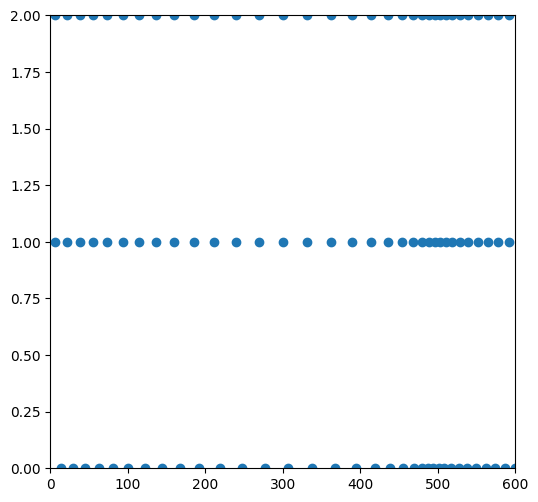

In [13]:


# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots(figsize=(6,6), dpi=100)

ax.set_xlim(( 0, 600))
ax.set_ylim((0, 2))
scat = ax.scatter([], [])

# initialization function: plot the background of each frame
def init():
    scat.set_offsets([0,0])
    return (scat,)

# animation function. This is called sequentially
def animate(i):
    x = location[i,:]
    y = lane[i, :]
    plot_data = np.array([x,y])
    plot_data = np.transpose(plot_data)
    
    scat.set_offsets(plot_data)
    return (scat,)


# call the animator. blit=True means only re-draw the parts that have changed so that the animations display much more quickly.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(t), interval=30, blit=True)


anim.save('multi_lane.mp4', writer = 'ffmpeg')